# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random

# Import API key
from api_keys import apy_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "citiespy.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
url = "http://api.openweathermap.org/data/2.5/weather?"

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
   

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# Create variables to hold data from weather API calls
latitude=[]
longitude=[]
temp=[]
humidity=[]
cloud=[]
wind=[]
city_name=[]
count = 0

for city in cities:
    # Build query URL
    query_url = url + "appid=" + apy_key + "&q=" + city + "&units=metric"   
    # Get weather data
    response = requests.get(query_url)
    response_json= response.json()
    count+=1
    time.sleep(2)
    # Append weather data to lists    
    if response_json ["cod"] == 200:
        print(f"City: {count} {response_json['name']} {query_url}")
        latitude.append(response_json["coord"]["lat"])
        longitude.append(response_json["coord"]["lon"])
        temp.append(response_json["main"]["temp"])
        humidity.append(response_json["main"]["humidity"])
        cloud.append(response_json["clouds"]["all"])
        wind.append(response_json["wind"]["speed"])
        city_name.append(response_json['name'])
    else:
        print("Missing result... skipping.")

City: 1 Dikson http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=dikson&units=metric
City: 2 Puerto Ayora http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=puerto ayora&units=metric
Missing result... skipping.
City: 4 Hobart http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=hobart&units=metric
City: 5 Bethel http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=bethel&units=metric
City: 6 Tulsa http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=tulsa&units=metric
City: 7 Fountain http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=fountain&units=metric
City: 8 Conde http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=conde&units=metric
Missing result... skipping.
City: 10 Rikitea http://api.openweathermap.org/data/2.5/weather?appid=5

City: 72 Paamiut http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=paamiut&units=metric
City: 73 Vaini http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=vaini&units=metric
City: 74 Cap Malheureux http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=cap malheureux&units=metric
City: 75 Xining http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=xining&units=metric
City: 76 Richards Bay http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=richards bay&units=metric
City: 77 Punta Arenas http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=punta arenas&units=metric
City: 78 Henties Bay http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=henties bay&units=metric
City: 79 Port Alfred http://api.openweathermap.org/data/2.5/weather?appid=50d7d479

City: 139 Iqaluit http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=iqaluit&units=metric
City: 140 Ust-Kut http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=ust-kut&units=metric
City: 141 Boyolangu http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=boyolangu&units=metric
Missing result... skipping.
City: 143 Husavik http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=husavik&units=metric
Missing result... skipping.
City: 145 Zyryanka http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=zyryanka&units=metric
Missing result... skipping.
City: 147 Carnarvon http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=carnarvon&units=metric
Missing result... skipping.
City: 149 Faanui http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=faanui&unit

City: 213 Cocobeach http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=cocobeach&units=metric
Missing result... skipping.
Missing result... skipping.
City: 216 Abnub http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=abnub&units=metric
City: 217 Monzon http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=monzon&units=metric
City: 218 Cidreira http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=cidreira&units=metric
City: 219 Flinders http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=flinders&units=metric
City: 220 Bourges http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=bourges&units=metric
City: 221 Dingle http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=dingle&units=metric
City: 222 Westport http://api.openweathermap.org/data/2

City: 280 Broken Hill http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=broken hill&units=metric
City: 281 Yerbogachen http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=yerbogachen&units=metric
City: 282 Gat http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=gat&units=metric
City: 283 Castro http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=castro&units=metric
City: 284 Balikpapan http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=balikpapan&units=metric
City: 285 Ca Mau http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=ca mau&units=metric
City: 286 Vardo http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=vardo&units=metric
City: 287 Vao http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=vao

City: 353 Zalantun http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=zalantun&units=metric
City: 354 Calella http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=calella&units=metric
City: 355 Yeppoon http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=yeppoon&units=metric
City: 356 Oksfjord http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=oksfjord&units=metric
City: 357 San Javier http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=san javier&units=metric
City: 358 Caldas Novas http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=caldas novas&units=metric
City: 359 Shahganj http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=shahganj&units=metric
City: 360 Anqing http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235d

City: 421 Baruun-Urt http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=baruun-urt&units=metric
City: 422 Eenhana http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=eenhana&units=metric
City: 423 Banamba http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=banamba&units=metric
City: 424 Mackay http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=mackay&units=metric
City: 425 Biltine http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=biltine&units=metric
City: 426 Puerto Escondido http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=puerto escondido&units=metric
City: 427 Beloha http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=beloha&units=metric
City: 428 San Angelo http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e23

City: 486 Pingliang http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=pingliang&units=metric
City: 487 Camargo http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=camargo&units=metric
City: 488 Hambantota http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=hambantota&units=metric
City: 489 Kalavai http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=kalavai&units=metric
City: 490 Marystown http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=marystown&units=metric
City: 491 Severodvinsk http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=severodvinsk&units=metric
City: 492 Jawhar http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=jawhar&units=metric
City: 493 Bubaque http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235

City: 551 Gualeguay http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=gualeguay&units=metric
City: 552 Hokitika http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=hokitika&units=metric
Missing result... skipping.
City: 554 Batagay-Alyta http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=batagay-alyta&units=metric
City: 555 Grand-Santi http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=grand-santi&units=metric
City: 556 Launceston http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=launceston&units=metric
City: 557 Warrington http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=warrington&units=metric
City: 558 Luyang http://api.openweathermap.org/data/2.5/weather?appid=50d7d4798ff034e235db2daa3e79e226&q=luyang&units=metric
City: 559 Tiarei http://api.openweathermap.org/

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
print(len(latitude))

561


In [10]:
weather_data = pd.DataFrame({'City': city_name,
                              'Latitude':latitude,
                              'Longitude':longitude,
                               'Temperature': temp,
                               'Humidity':humidity,
                               'Cloud':cloud,
                                'Wind': wind
                             })
weather_data

,City,Latitude,Longitude,Temperature,Humidity,Cloud,Wind
0,Dikson,73.51,80.55,-21.80,76,8,0.92
1,Puerto Ayora,-0.74,-90.35,27.57,74,20,4.10
2,Hobart,-42.88,147.33,6.27,70,20,4.10
3,Bethel,60.79,-161.76,-3.25,92,90,4.10
4,Tulsa,36.16,-95.99,11.89,93,90,5.10
5,Fountain,38.68,-104.70,12.43,44,8,1.50
6,Conde,-11.81,-37.61,31.35,66,12,5.02
7,Rikitea,-23.12,-134.97,25.70,100,64,9.42
8,Nikolskoye,59.70,30.79,-3.48,85,75,5.00
9,Butaritari,3.07,172.79,26.53,100,88,4.92


In [12]:
weather_selected=weather_data.sample(500)

In [13]:
weather_data.to_csv('weather_selected_Output.csv',index = False, header = True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

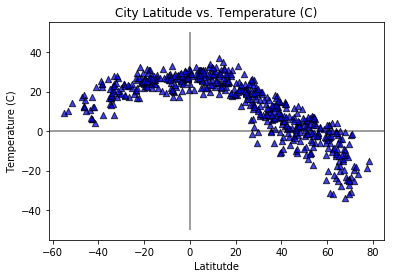

In [14]:
# Build a scatter plot City Latitude vs. Temperature
plt.scatter(latitude, temp, color='b',marker="^",edgecolors='black',s=40,alpha=0.75)
plt.vlines(0,-50,50, color='black',alpha=0.5)
plt.axhline(0, color='black',alpha=0.5)
plt.title("City Latitude vs. Temperature (C)")
plt.ylabel("Temperature (C)")
plt.xlabel("Latitutde")
plt.show()

Temperature is at its peak around the equator. The changes in seasons from north to the South, the North getting hotter and south getting colder.

#### Latitude vs. Humidity Plot

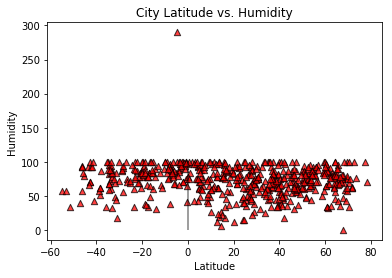

In [17]:
plt.scatter(latitude, humidity, color='r',marker="^",edgecolors='black',s=40,alpha=0.75)
plt.title("City Latitude vs. Humidity")
plt.vlines(0,0,100, color='black',alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The Humidity is lower when the temperature is high; this graph shows that the humidity increase during the day, independently of the latitude. It seems that there is an outlier because the max should 100%.

#### Latitude vs. Cloudiness Plot

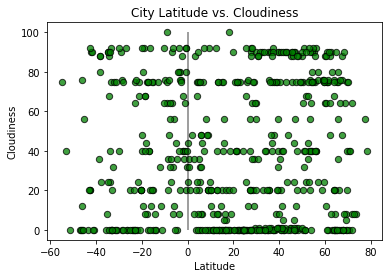

In [18]:
plt.scatter(latitude, cloud, color='g',marker="o",edgecolors='black',s=40,alpha=0.75)
plt.title("City Latitude vs. Cloudiness")
plt.vlines(0,0,100, color='black',alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

Sunshine duration measurement is an indicator of general cloudiness of a place. In this sample, cloudiness reading is dispersing along the latitude, but a cluster could be seen far from the equator another group of low cloudiness near the equator.

#### Latitude vs. Wind Speed Plot

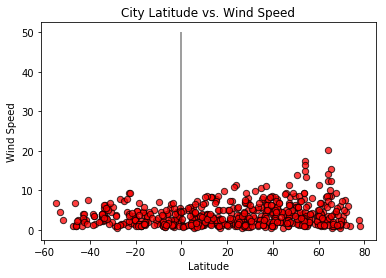

In [20]:
fig,ax = plt.subplots()
plt.scatter(latitude, wind, color='r',edgecolors='black',s=40,alpha=0.75)
plt.title("City Latitude vs. Wind Speed")
plt.vlines(0,0,50, color='black',alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

Wind speed for most cities seems to fall under ten mph. This is not different around equator a slight increase in wind speed in the northern hemisphere. There is not a hurricane season, make sense that the wind speed is pretty uniform near the hot area around the equator, and milder weather in the north and south hemisphere.

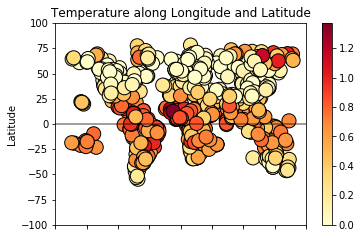

In [21]:
size_temp = np.round((((weather_data.Temperature)/100)**2)*10,2)

weather_data.plot(kind="scatter",x="Longitude",y="Latitude",grid=True, edgecolor="black",
                     c=size_temp,s=200,cmap=plt.cm.YlOrRd)
plt.xlabel("Longitude")
plt.tight_layout()
plt.title("Temperature along Longitude and Latitude")
plt.ylabel("Latitude")
plt.ylim([-100,100])
plt.grid(False)

plt.xlim([-200,200])
plt.subplots_adjust(bottom=.25, left=.25)

plt.axhline(0, color='black',alpha=0.5)
plt.savefig("Temperature approaching Equator")

plt.show()

The Temperature increases near the equator, and in the south while in the north it is still colder during this time of the year.